In [13]:
from google.colab import files

uploaded=files.upload()

Saving veriSeti.csv to veriSeti (1).csv


In [14]:
# BURADA VERİSETİMİZİ %70 EĞİTİM %30 OLACAK ŞEKİLDE RASTGELE AYIRIYORUZ

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

VeriSeti = pd.read_csv('veriSeti.csv')

VeriSeti.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

X = VeriSeti.drop('class', axis=1)
y = VeriSeti['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

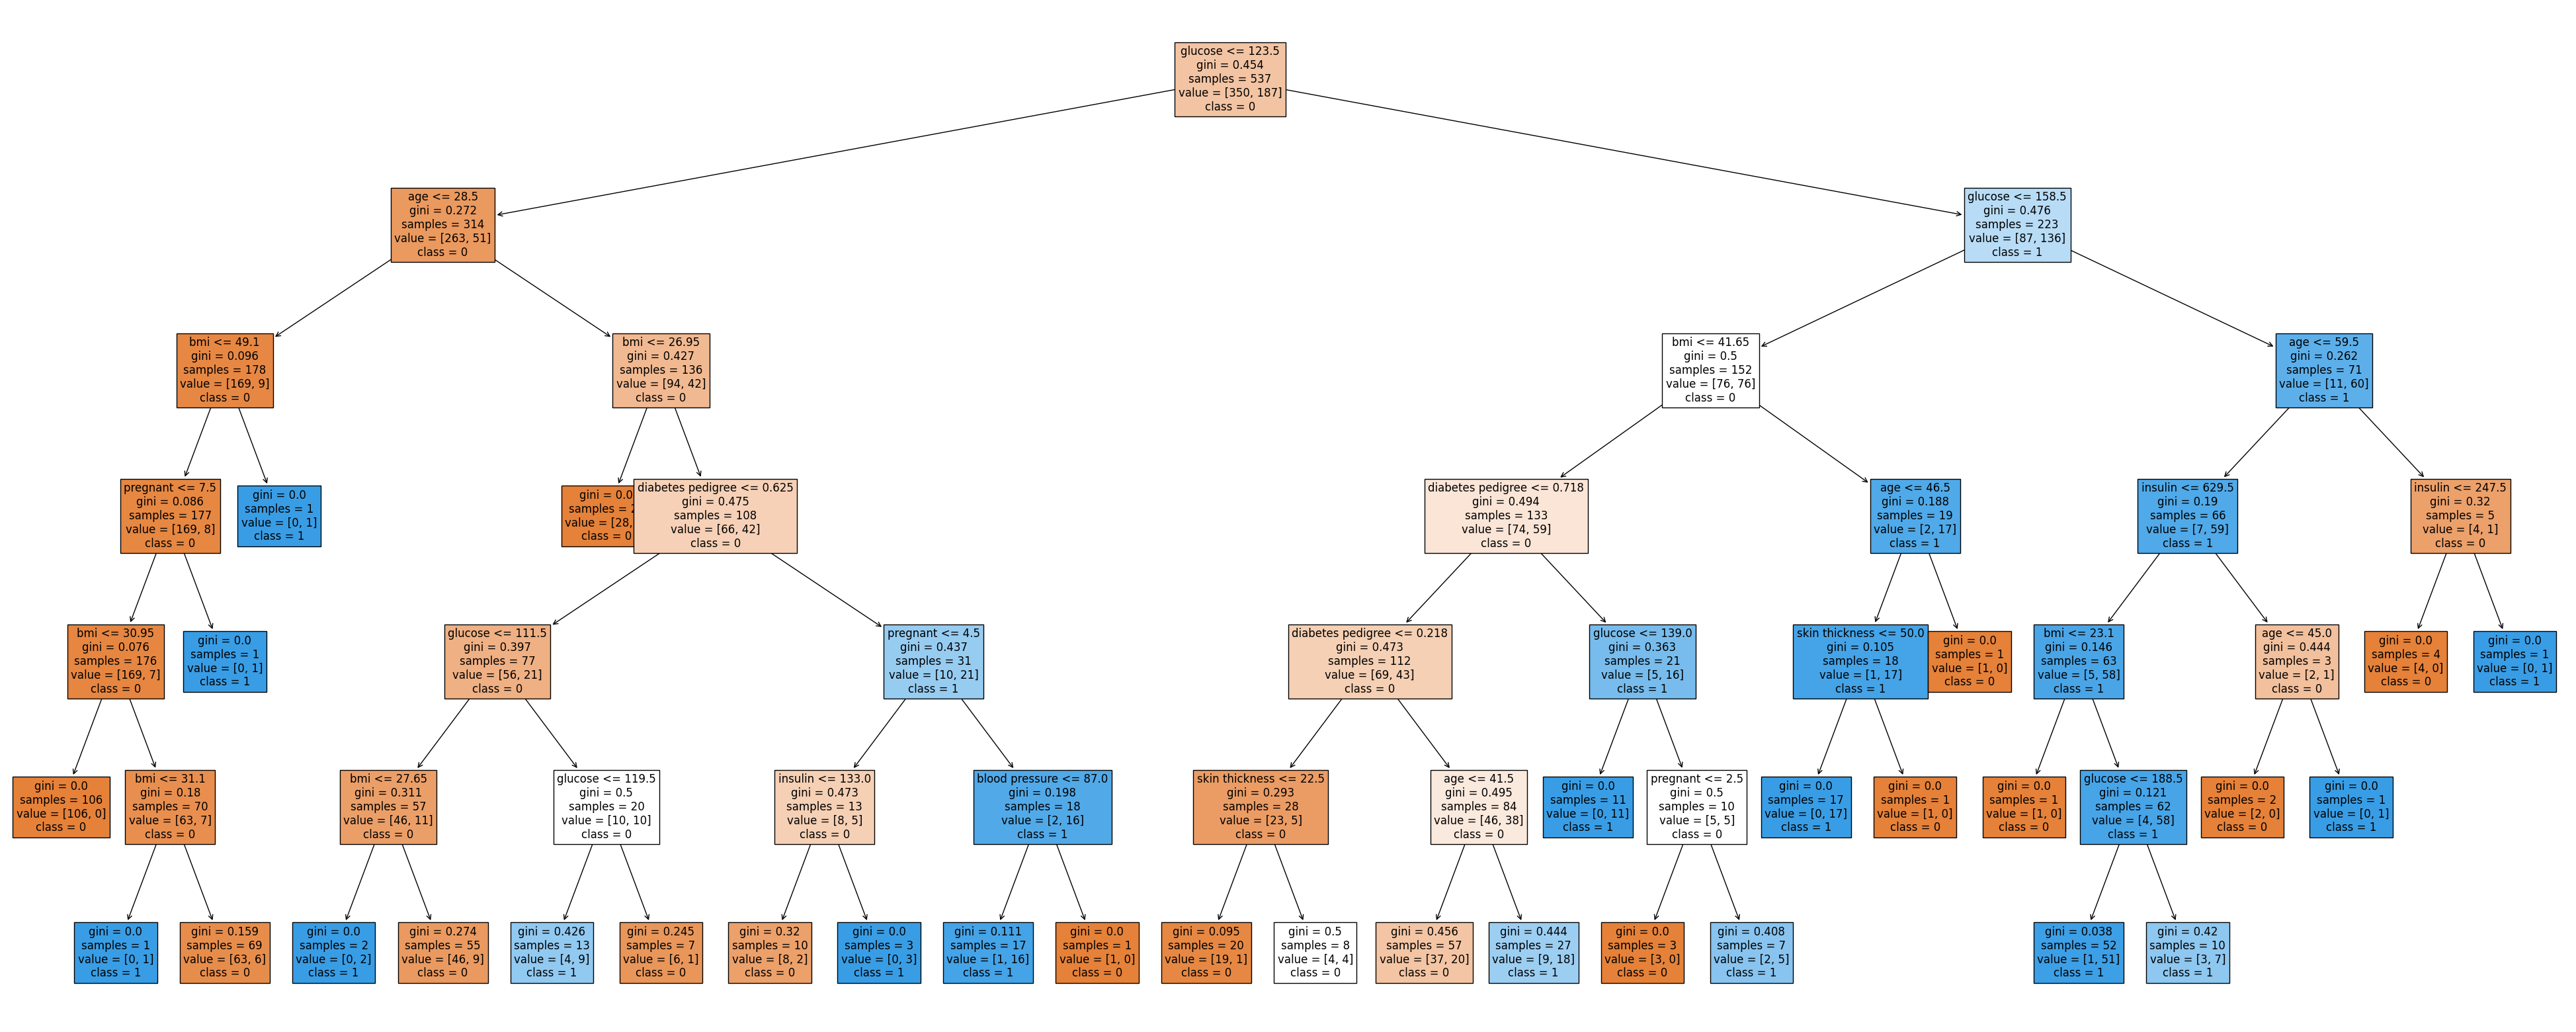

Accuracy Score (Karar Ağacı Sınıflandırma): 0.7229437229437229
Confusion Matrix (Karar Ağacı Sınıflandırma):
 [[121  29]
 [ 35  46]]
Classification Report (Karar Ağacı Sınıflandırma):
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.61      0.57      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [19]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Modeli oluşturma
decision_tree = DecisionTreeClassifier(max_depth=6)

# Modeli eğitme
decision_tree.fit(X_train, y_train)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(50, 20))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['0', '1'],fontsize=12)
plt.show()

# Test verisi için tahmin yapma
y_pred_tree = decision_tree.predict(X_test)

# Performans metriklerini hesaplama
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

print("Accuracy Score (Karar Ağacı Sınıflandırma):", tree_accuracy)
print("Confusion Matrix (Karar Ağacı Sınıflandırma):\n", tree_conf_matrix)
print("Classification Report (Karar Ağacı Sınıflandırma):\n", tree_classification_report)
